## this is the beginning of my python programming in face swapper

# Imports

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
import glob

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


# Face Analysis model 

In [2]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640,640))

C:\Users\bansa\AppData\Local\Programs\Python\Python312\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [3]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx ',
                                download=False,
                                download_zip=False)

# Reading and Displaying the image


In [71]:
# Location of this jupyter notebook
notebook_location = os.getcwd()


#Location of the images i have stored locally
img1_path = notebook_location + "/images/johncena.jpg"
himymLocation = notebook_location + "/images/himym.jpg"
maxlocation = notebook_location + "/images/maxverstappen.jpg"


# Loaded the images from my folder and displaying them

In [72]:
# Load the image using OpenCV
img = cv.imread(img1_path)
himym = cv.imread(himymLocation)
img3 = cv.imread(maxlocation)

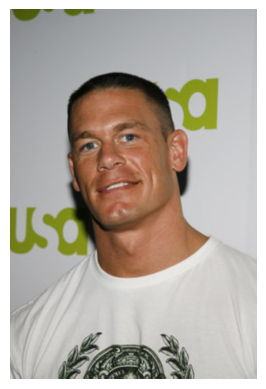

In [79]:
# Convert the image from BGR to RGB
#OpenCV loads the image in BGR format, convert to RGB for matplotlib
johncena = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img[:,:,::-1])
plt.axis('off')  # Optional: to turn off the axis
plt.show()

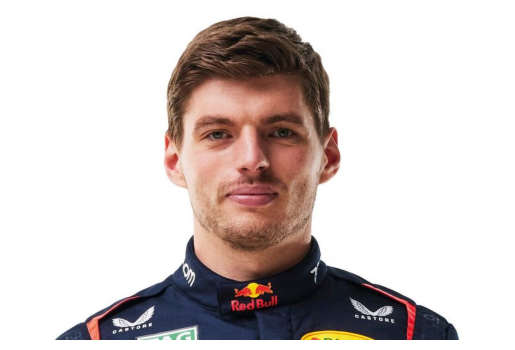

In [36]:
max = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
# Display the image using Matplotlib
plt.imshow(max)
plt.axis('off')  # Optional: to turn off the axis
plt.show()

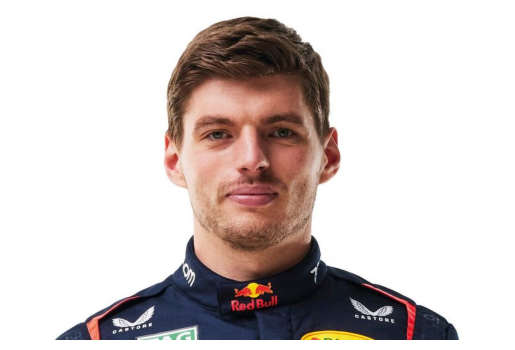

In [39]:
#Alternative way of converting image from BGR to RGB
plt.imshow(img3[:,:,::-1])
plt.axis("off")
plt.show()

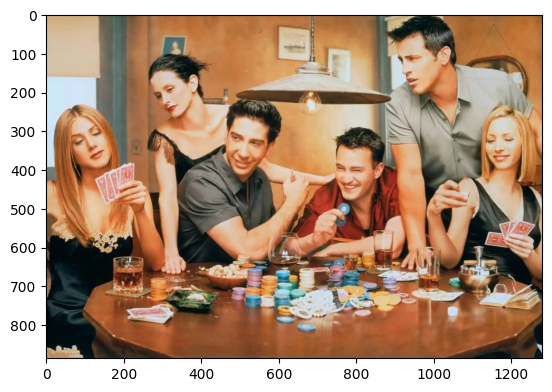

In [7]:
friends = ins_get_image('t1')
plt.imshow(friends[:,:,::-1])
plt.show()

# Detecting the Faces

In [91]:
# Detected faces

john_face = app.get(johncena)
faces = app.get(himym)
max_face = app.get(max)

In [75]:
len(john_face)


1

The faces have been recognised and are saved as a list as seen above

Now to display the faces recognised.

# Displaying the faces
## Showing individual faces detected above

Dimensions of the two pictures

In [46]:
max.shape


(533, 800, 3)

In [76]:
john_face


[{'bbox': array([248.3155 , 317.59055, 648.96954, 872.06396], dtype=float32),
  'kps': array([[317.38828, 563.86176],
         [486.78366, 522.26385],
         [390.4783 , 621.13776],
         [359.39514, 737.00946],
         [516.252  , 700.4723 ]], dtype=float32),
  'det_score': 0.87684906,
  'landmark_3d_68': array([[ 2.69885498e+02,  6.04413147e+02,  3.47234955e+02],
         [ 2.86042725e+02,  6.58895020e+02,  3.29648590e+02],
         [ 3.00470367e+02,  7.15347229e+02,  3.06327606e+02],
         [ 3.14392670e+02,  7.69004456e+02,  2.71741089e+02],
         [ 3.29074310e+02,  8.14602173e+02,  2.12690613e+02],
         [ 3.53156464e+02,  8.43736267e+02,  1.61101608e+02],
         [ 3.77589142e+02,  8.62596436e+02,  1.15873642e+02],
         [ 4.02341003e+02,  8.69828796e+02,  5.99134293e+01],
         [ 4.60120178e+02,  8.66066650e+02,  1.44484749e+01],
         [ 5.28606323e+02,  8.38375549e+02,  2.48976021e+01],
         [ 5.79290894e+02,  8.08067261e+02,  6.70960846e+01],
      

The faces have been detected by the model and now are displayed as shown

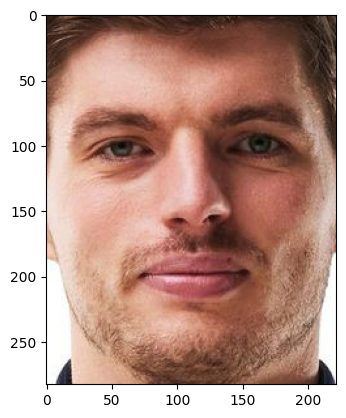

In [64]:
assert len(max_faces) == 1
max_face = max_faces[0]
bbox = max_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(max[bbox[1]:bbox[3],bbox[0]:bbox[2]])
plt.show()

Creating the boxes to display the images in 

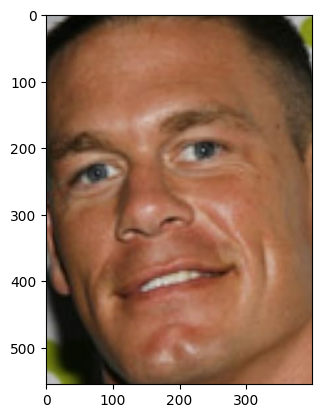

In [77]:
assert len(john_face) == 1
john_face = john_face[0]
bbox = john_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(johncena[bbox[1]:bbox[3],bbox[0]:bbox[2]])
plt.show()

Displaying the faces into the boxes I made

In [81]:
# # Figure is the whole frame here
# # axs are the number of boxes
# #subplots(rows, coloumns, figsize=(width, height)
# fig, axs = plt.subplots(1, 6, figsize=(20, 4))

# # Loop through each subplot and turn off the axes
# for ax in axs:
#     ax.axis([0,5,0,5])
      


In [80]:
# friends = ins_get_image('t1')
# fig, axs = plt.subplots(1, 5, figsize=(12, 5))

# for i, face in enumerate(faces):
#     bbox = face['bbox']
#     bbox = [int(b) for b in bbox]
#     axs[i].imshow(himym[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
#     axs[i].axis('on')

In [14]:
# #
# # faces2 = app.get(img)
# plt.imshow(faces2)
# plt.axis('on')    

In [82]:

# fig, ax = plt.subplots(figsize=(5, 5))

# # Access the 4th face (index 3)
# face = faces[3]
# bbox = face['bbox']
# bbox = [int(b) for b in bbox]

# # Display the 4th face in a single plot
# ax.imshow(himym[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
# ax.axis('on')  # You can use 'off' to hide the axis if needed

# plt.show()








# Swapping the Faces ( FINALLY )

In [16]:
from insightface.app import FaceAnalysis

swapper = FaceAnalysis()
swapper.prepare(ctx_id=0, det_size=(640, 640))


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [84]:
# Sorts left to right
faces = sorted(faces, key = lambda x : x.bbox[0])
res = img.copy()
assert len(faces)==5 # Confirm 5 faces found
source_face = max_faces[0]

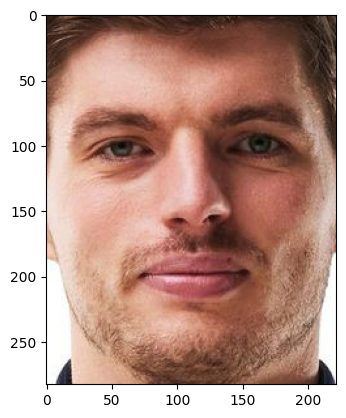

In [87]:
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(max[bbox[1]:bbox[3],bbox[0]:bbox[2]])
plt.show()

In [90]:
for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True)

TypeError: FaceAnalysis.get() got an unexpected keyword argument 'paste_back'

In [ ]:
# Assuming `swapper` is the initialized swapping object
# The method accepts 2 or 3 arguments

# Loop through each face to swap with the source face
for face in faces:
    res = swapper.get(res, face)  # Passing the image and the face to replace

# Display the resulting image
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
